Parte 2:

Dado os sistemas do slide 08 da apresentação 05 – Sistemas Realimentados:

Com o Matlab ou equivalente:

- Obtenha a função de transferência discreta equivalente de malha fechada;

- Verifique a resposta do sistema para uma entrada do tipo degrau unitário com a função step;

- Obtenha a equação recursiva do sistema em malha fechada;

- Verifique a resposta do sistema para uma entrada do tipo degrau unitário utilizando a equação recursiva em malha fechada;

- Obtenha a equação recursiva da função de transferência de ramo direto G(z);

- Verifique a resposta do sistema para uma entrada do tipo degrau unitário utilizando a equação recursiva de G(z) e do somador;

- Compare as respostas

 

In [1]:
import numpy as np
import control
import matplotlib.pyplot as plt

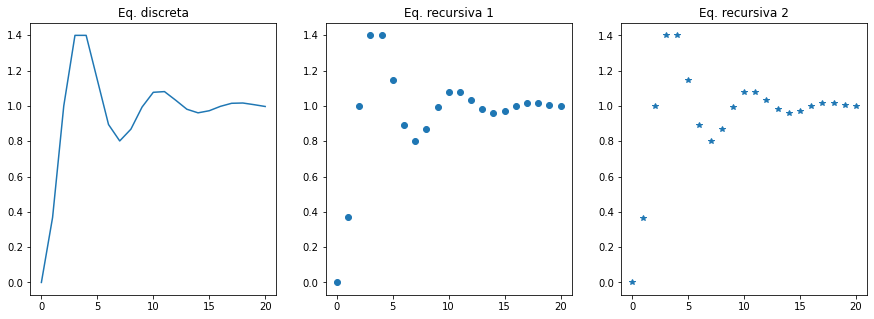

In [2]:
T = 1    # Período de amostragem 
Tf = 20     # Tempo final de simulação
plt.subplots(1,3, figsize=(15, 5)) 

###
Gs = control.tf(1,[1, 1, 0])
Hs = control.tf(1,1)
Gz = control.c2d(Gs,T)
Hz = control.c2d(Hs,T)
GHz = control.c2d(Gs*Hs,T)

FTMFz = Gz/(1+Gz*Hz)
x, y = control.step_response(FTMFz, Tf);
plt.subplot(1,3,1)
plt.plot(x, y)
plt.title("Eq. discreta")


###
Kmax = int((Tf+T)/T)
y = np.zeros(Kmax);
x = np.ones(Kmax)
y[1] = 0.3679
for k in range(2, Kmax):
    y[k]= 1*y[k-1] - 0.6321*y[k-2] + 0.3679*x[k-1] +0.2642*x[k-2]    
plt.subplot(1,3,2)
plt.title("Eq. recursiva 1")
plt.plot(np.arange(0, Tf+T, T), y, 'o')


###
Kmax = int((Tf+T)/T)
y = np.zeros(Kmax);
x = np.ones(Kmax)
y[1] = 0.3679
for k in range(2, Kmax):
    y[k]= 1.368*y[k-1] - 0.3679*y[k-2] + 0.3679*(x[k-1] - y[k-1]) + 0.2642*(x[k-2] - y[k-2])    
plt.subplot(1,3,3)
plt.title("Eq. recursiva 2")
plt.plot(np.arange(0, Tf+T, T), y, '*')

(array([1.        , 0.36787944]), array([-0.71828183]))

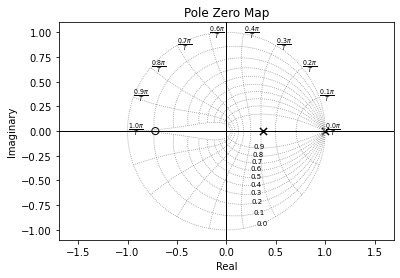

In [123]:
control.pzmap(GHz, grid=True)